In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import glob
import cv2

%matplotlib inline

In [3]:
# prepare object points
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for i, filename in enumerate(images):
    img = cv2.imread(filename)
    img_chessboard = np.copy(img)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw chessboard
        cv2.drawChessboardCorners(img_chessboard, (9,6), corners, ret)


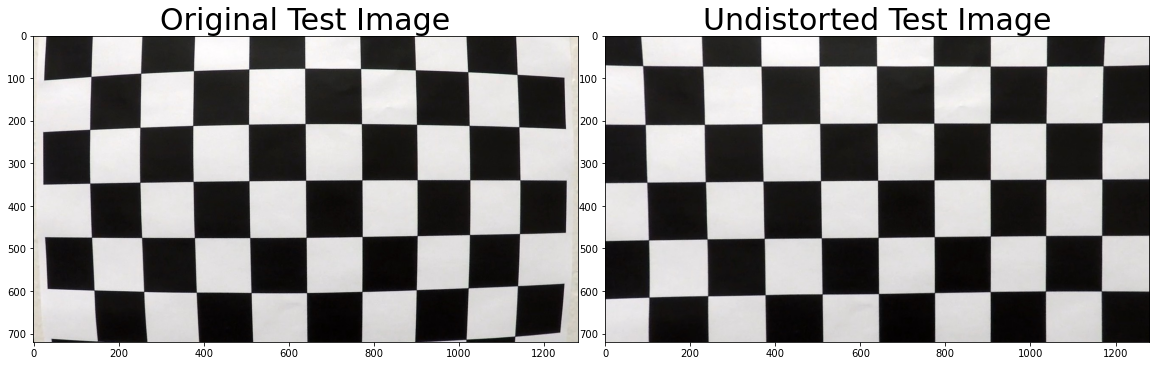

In [4]:
mpimg.imread("camera_cal/calibration1.jpg")
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2], None, None)

# Read a test image
img = mpimg.imread("camera_cal/calibration1.jpg")
# Undistorting the test image
img2 = cv2.undistort(img, mtx, dist, None, mtx)

# Plot Original and Undistorted Test Image
plt.figure(figsize=(20,50))
plt.subplots_adjust(hspace = .2, wspace=.05)

# Plot Original Test Image
plt.subplot(1,2,1)
plt.title('Original Test Image', fontsize=30)
fig =plt.imshow(img)

# Plot Undistorted Test Image
plt.subplot(1,2,2)
plt.title('Undistorted Test Image', fontsize=30)
fig =plt.imshow(img2)